# First Order Motion Model for Image Animation

## [Paper](https://arxiv.org/abs/2003.00196)
## [GitHub](https://github.com/AliaksandrSiarohin/first-order-model)

### Approach
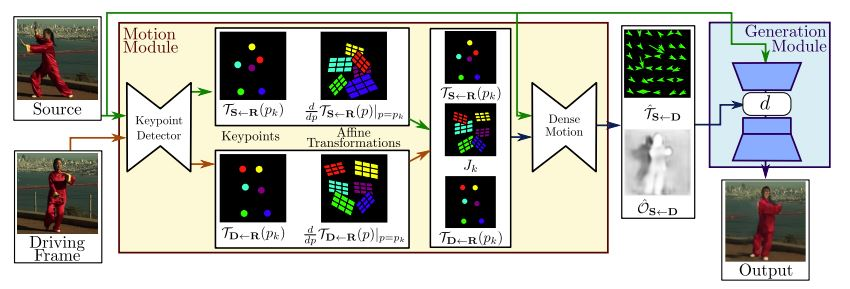

In [ ]:
!pip install imageio-ffmpeg

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model

In [ ]:
import os
os.chdir('first-order-model')

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML

In [ ]:
def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

In [ ]:
source_image = imageio.imread('../../input/input-faces/Vladimir_Putin.jpg')
driving_video = imageio.mimread('../../input/input-talking/Trump.mp4')

In [ ]:
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

In [ ]:
HTML(display(source_image, driving_video).to_html5_video())

## Load Model

In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='../../input/first-order-motion-model/vox-cpk.pth.tar')

## Perform image animation

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

### Using your own image

In [ ]:
source_image = imageio.imread('../../input/input-faces/Taylor_Swift.jpg')
driving_video = imageio.mimread('../../input/input-talking/Obama.mp4', memtest=False)


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

HTML(display(source_image, driving_video, predictions).to_html5_video())

In [ ]:
source_image = imageio.imread('../../input/input-faces/Mona_Lisa.jpg')
driving_video = imageio.mimread('../../input/input-talking/Leonardo.mp4', memtest=False)


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

HTML(display(source_image, driving_video, predictions).to_html5_video())

In [ ]:
source_image = imageio.imread('../../input/input-faces/Van_Gogh.jpg')
driving_video = imageio.mimread('../../input/input-talking/Trump.mp4', memtest=False)


#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True,
                             adapt_movement_scale=True)

HTML(display(source_image, driving_video, predictions).to_html5_video())